# Data diagnostics

Check each data set after preprocessing whether it looks reasonable

In [1]:
import os
from os import path as op
import numpy as np
import matplotlib.pyplot as plt
import mne

from library import config, helpers

Study path is set to: /raven/ptmp/fklotzsche/Experiments/vMemEcc


In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
subID = 'VME_S01'
epo_part = 'stimon'

sub_list = np.setdiff1d(np.arange(1,config.n_subjects_total+1), config.ids_missing_subjects)
sub_list_str = ['VME_S%02d' % sub for sub in sub_list]

all_data = {}
for subID in sub_list_str:
    fname = f'{subID}-{epo_part}-rejepo'
    fpath = op.join(config.paths['03_preproc-rejectET'], epo_part, 'cleaneddata')
    data = helpers.load_data(fname,
                             fpath,
                             append='-epo',
                             verbose=False)
    all_data[subID] = data

## Power spectrum

    Using multitaper spectrum estimation with 7 DPSS windows


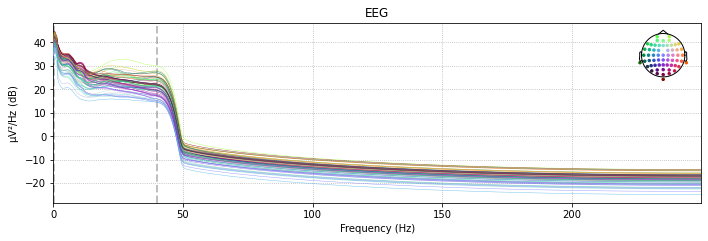

In [4]:
out = data.plot_psd(n_jobs=config.n_jobs)

## Does ERP look healthy?

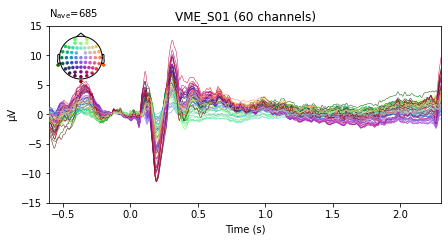

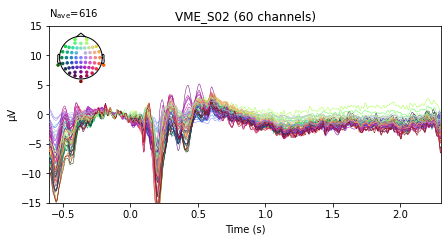

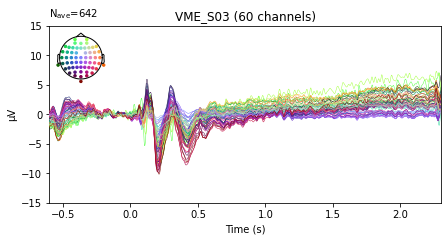

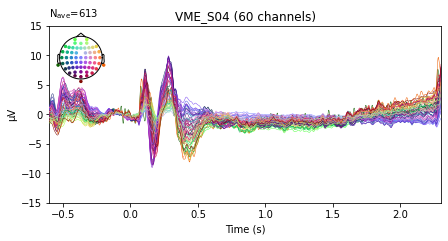

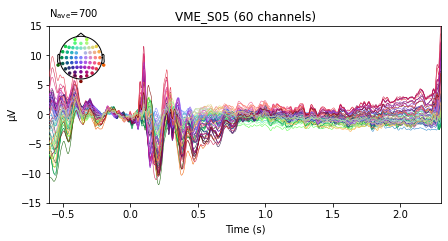

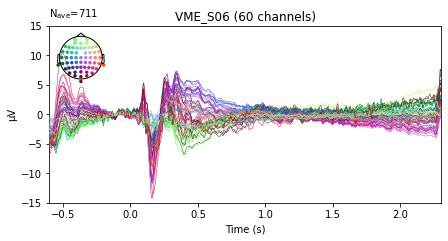

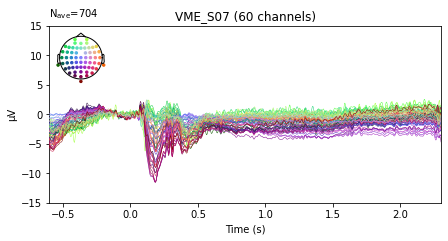

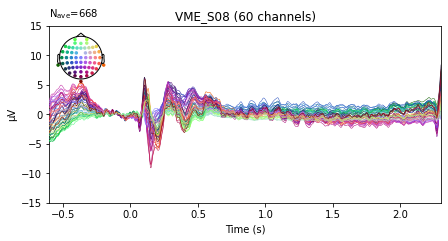

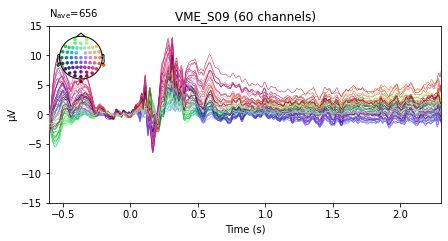

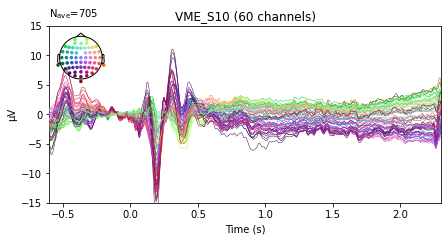

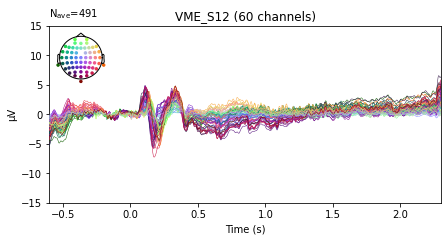

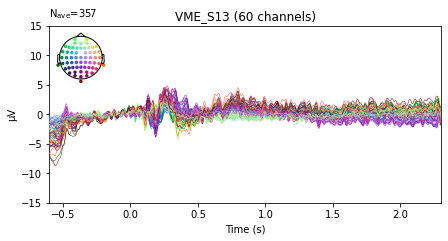

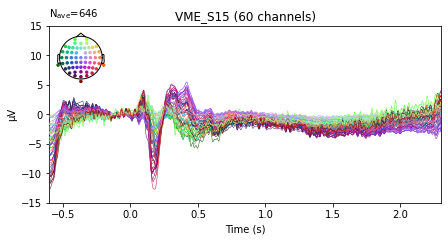

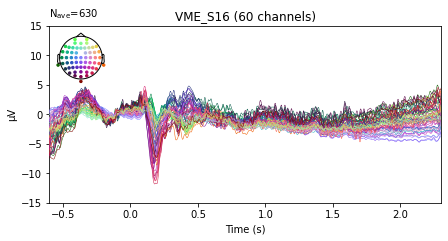

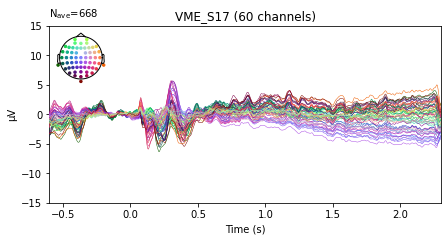

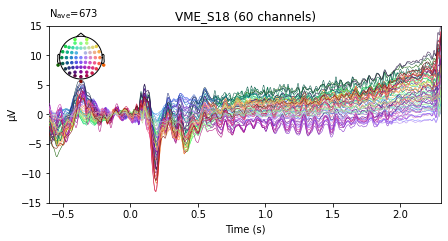

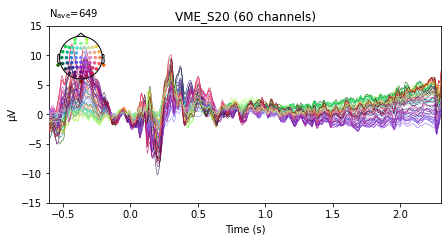

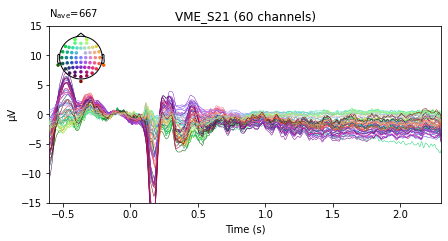

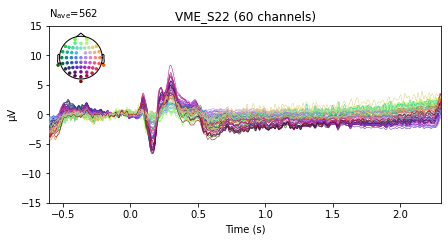

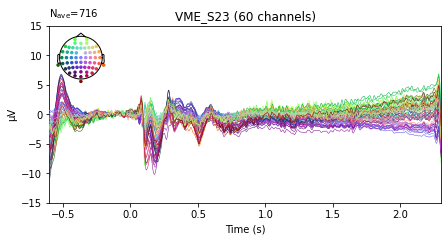

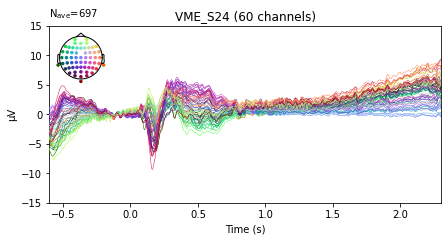

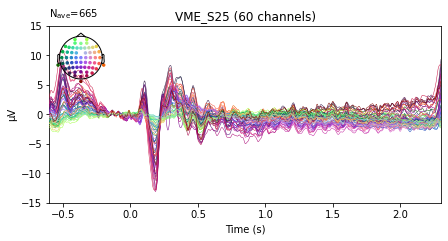

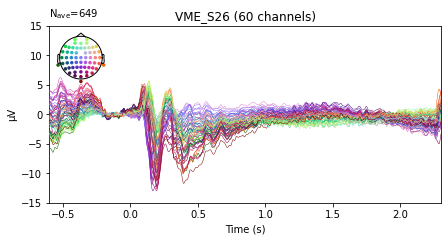

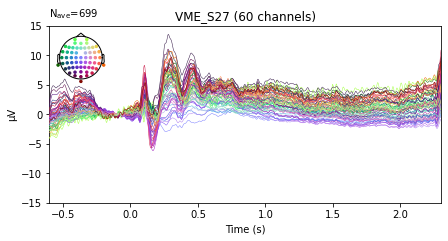

In [5]:
for subID in all_data:
    data = all_data[subID]
    evo = data.copy().average()
    _ = evo.plot(titles=subID,
                 spatial_colors=True,
                 ylim={'eeg': [-15,15]})

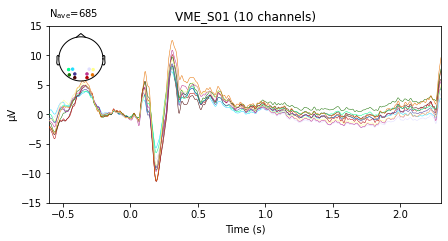

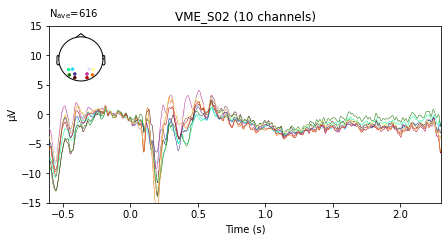

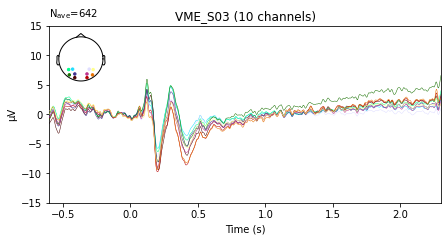

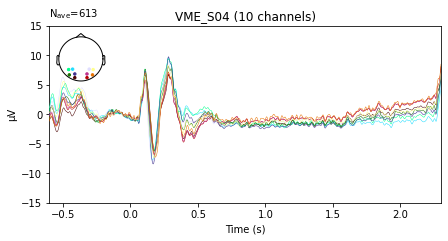

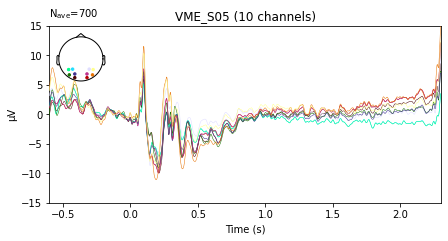

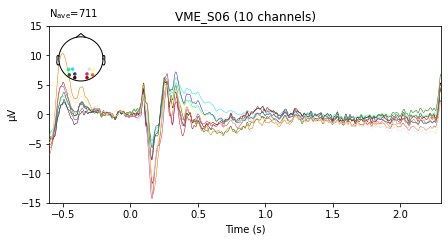

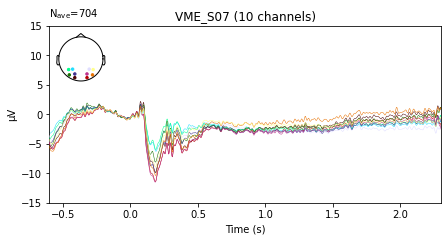

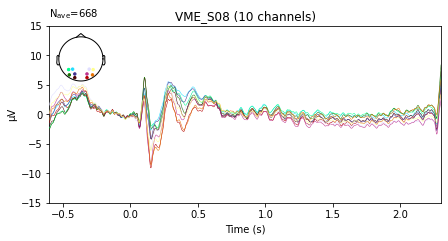

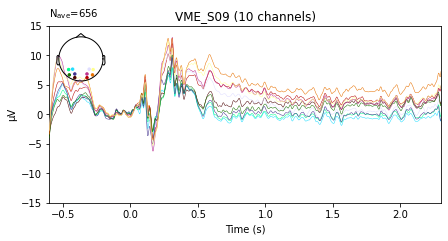

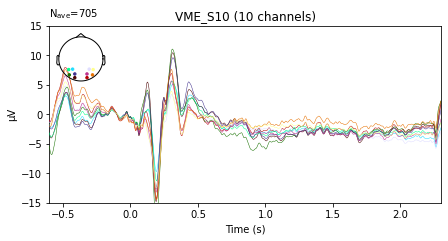

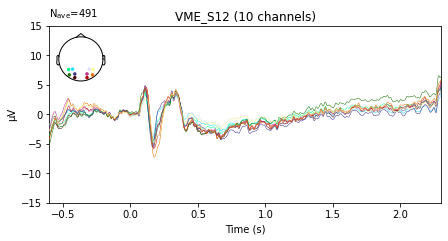

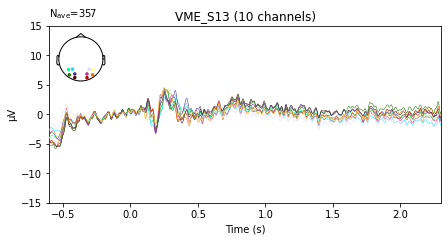

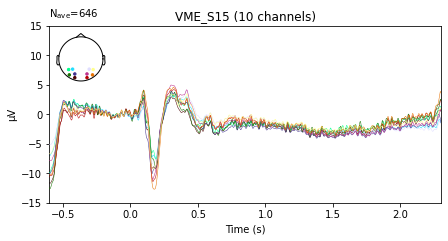

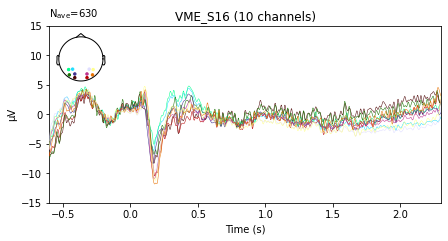

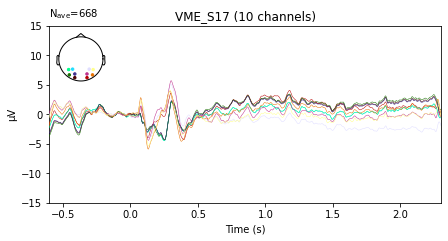

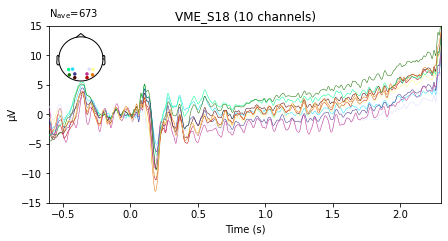

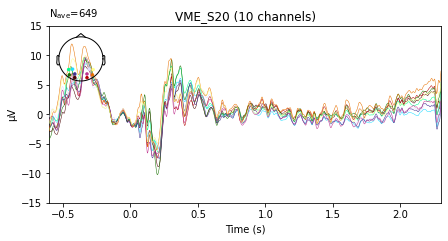

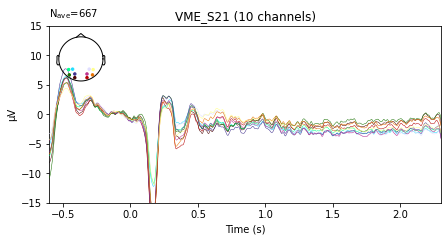

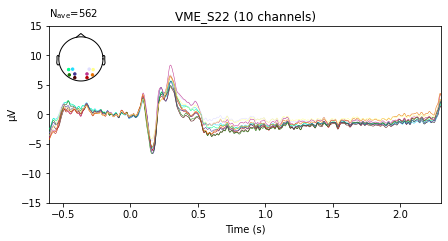

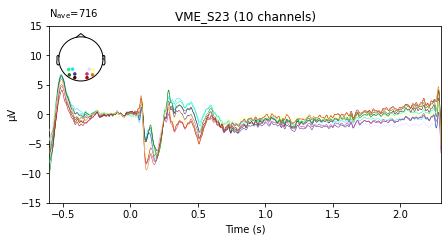

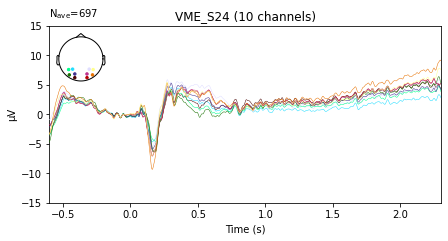

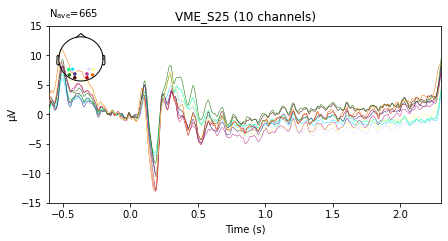

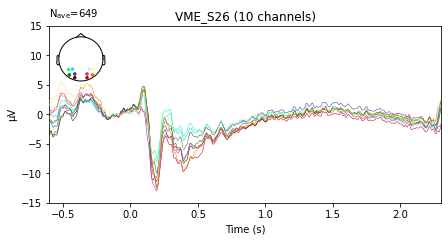

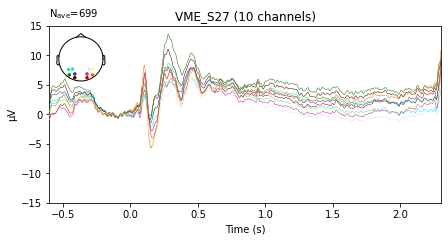

In [6]:
for subID in all_data:
    data = all_data[subID]
    evo = data.copy().average()
    _ = evo.copy().pick_channels(config.chans_CDA_all).\
        plot(titles=subID,
             spatial_colors=True,
             ylim={'eeg': [-15,15]})

## CDA

combining channels using "mean"
combining channels using "mean"


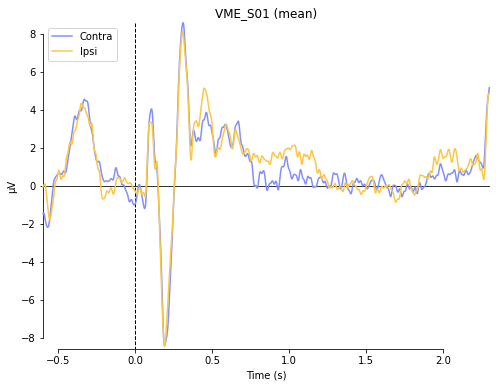

combining channels using "mean"
combining channels using "mean"


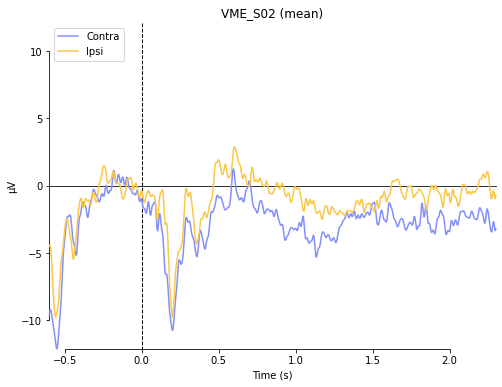

combining channels using "mean"
combining channels using "mean"


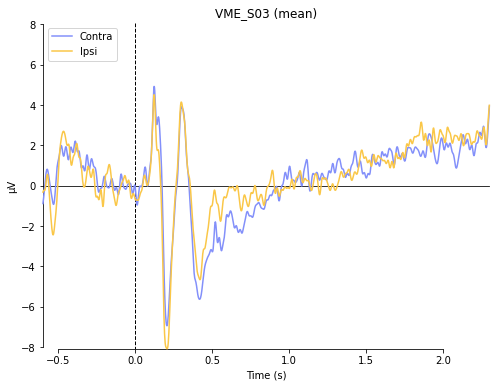

combining channels using "mean"
combining channels using "mean"


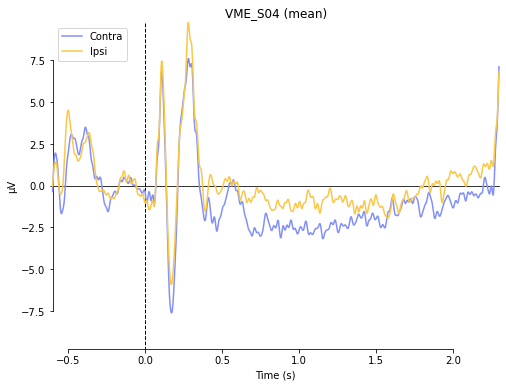

combining channels using "mean"
combining channels using "mean"


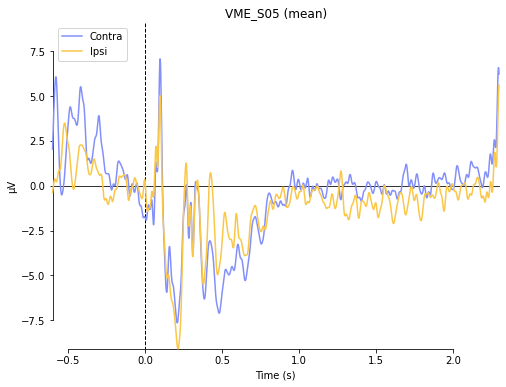

combining channels using "mean"
combining channels using "mean"


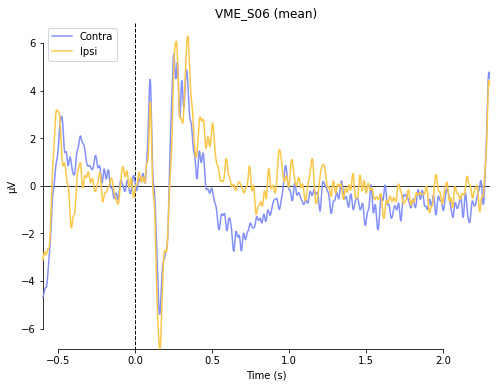

combining channels using "mean"
combining channels using "mean"


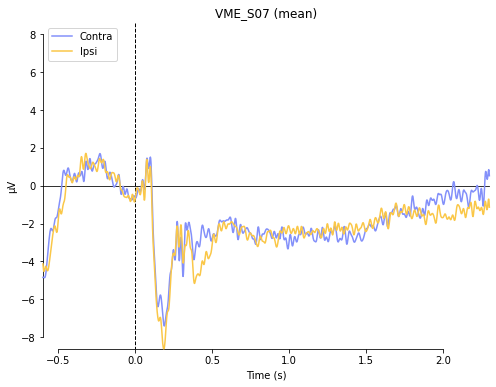

combining channels using "mean"
combining channels using "mean"


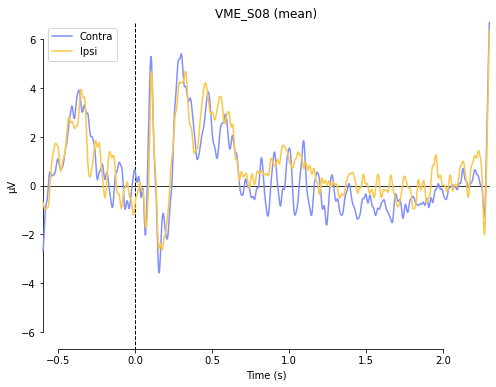

combining channels using "mean"
combining channels using "mean"


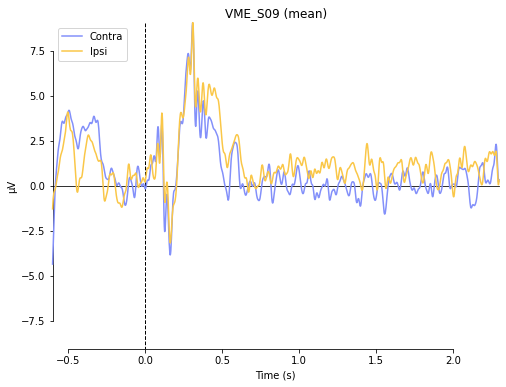

combining channels using "mean"
combining channels using "mean"


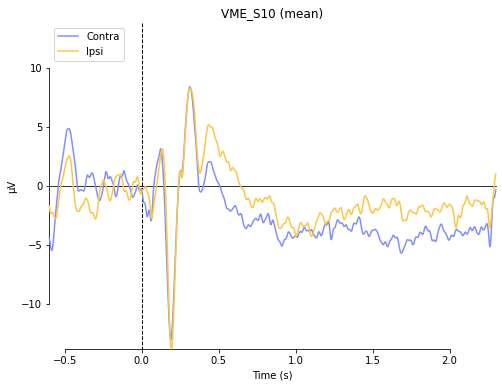

combining channels using "mean"
combining channels using "mean"


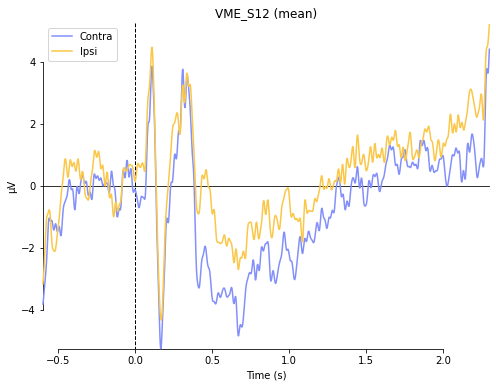

combining channels using "mean"
combining channels using "mean"


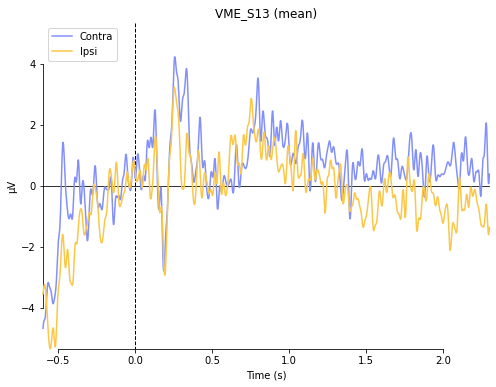

combining channels using "mean"
combining channels using "mean"


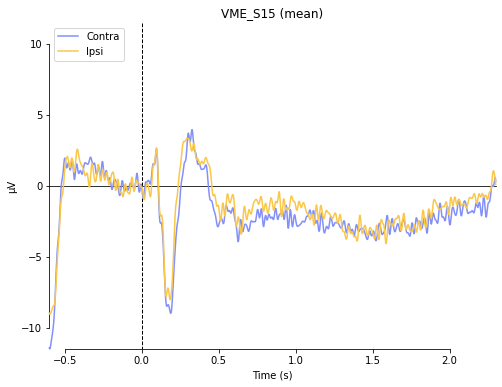

combining channels using "mean"
combining channels using "mean"


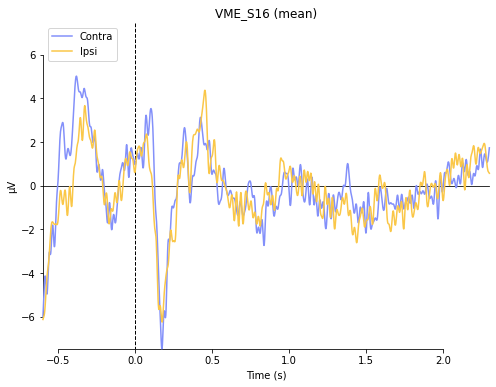

combining channels using "mean"
combining channels using "mean"


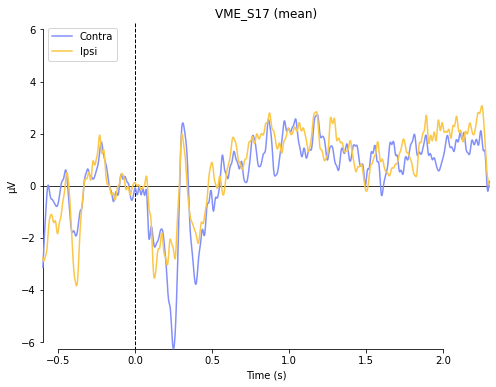

combining channels using "mean"
combining channels using "mean"


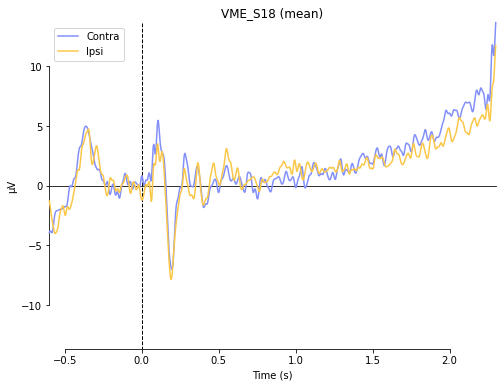

combining channels using "mean"
combining channels using "mean"


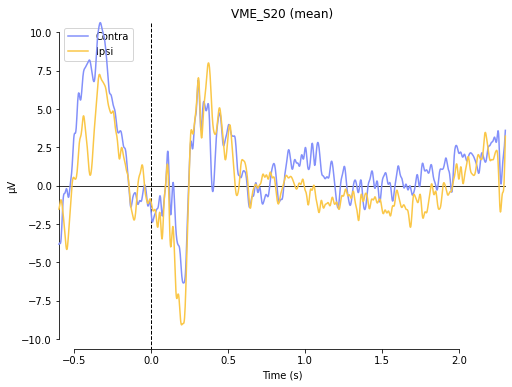

combining channels using "mean"
combining channels using "mean"


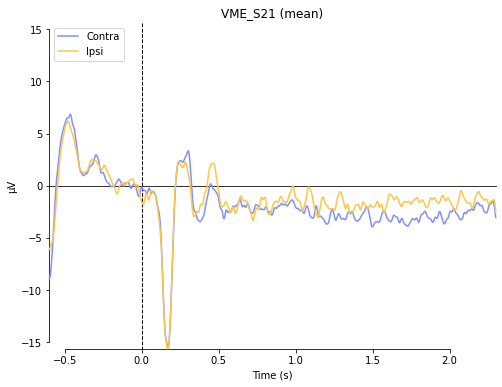

combining channels using "mean"
combining channels using "mean"


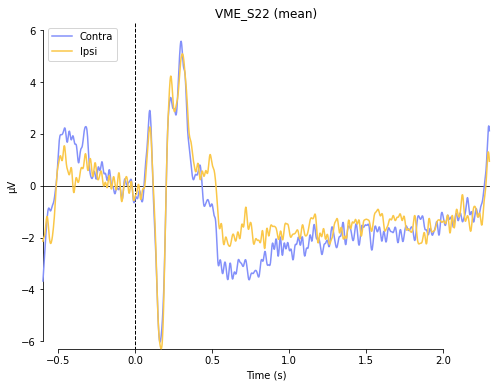

combining channels using "mean"
combining channels using "mean"


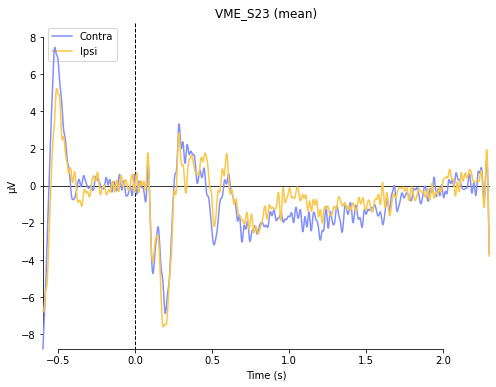

combining channels using "mean"
combining channels using "mean"


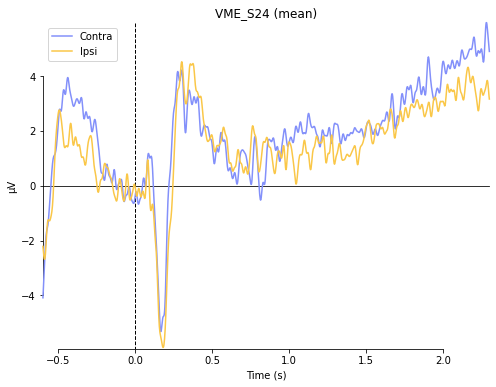

combining channels using "mean"
combining channels using "mean"


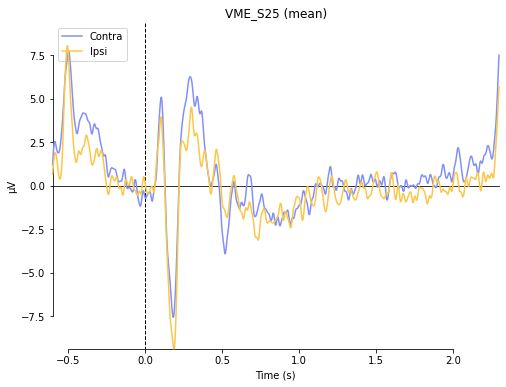

combining channels using "mean"
combining channels using "mean"


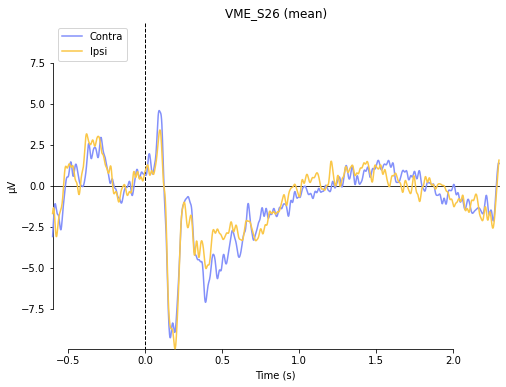

combining channels using "mean"
combining channels using "mean"


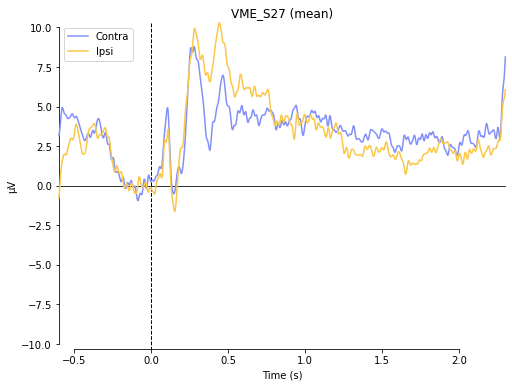

In [7]:
for subID in all_data:
    data = all_data[subID]
    plotme = dict()
    plotme['Contra'] = data.copy().pick_channels(config.chans_CDA_dict['Left'])[config.event_dict['CueR']].average()
    plotme['Ipsi'] = data.copy().pick_channels(config.chans_CDA_dict['Left'])[config.event_dict['CueL']].average()
    mne.viz.plot_compare_evokeds(plotme,
                                 title=subID,
                             combine='mean',
                             colors={'Contra': config.colors['Contra'],
                                     'Ipsi': config.colors['Ipsi']})

In [4]:
all_evos = []
#for epo_part in ''
fpath = op.join(config.paths['03_preproc-rejectET'], epo_part, 'cleaneddata')
files = os.listdir(fpath)
revos_dict = {}
revos_dict['Ipsi'] = []
revos_dict['Contra'] = []
levos_dict = {}
levos_dict['Ipsi'] = []
levos_dict['Contra'] = []
for f in files:
    subID = f.split('-')[0]
    if subID in ['VME_S12', 'VME_S13']:
        print(f'skipping {subID}')
        continue
        print('That was a lie')
    dat = mne.read_epochs(op.join(fpath, f), verbose=False)
    #evos_dict['LoadLow'].append(dat[config.event_dict['CueL']][config.event_dict['LoadLow']].average())
    #evos_dict['LoadHigh'].append(dat[config.event_dict['CueL']][config.event_dict['LoadHigh']].average())
    revos_dict['Contra'].append(dat[config.event_dict['CueL']].pick_channels(config.chans_CDA_dict['Right']).average())
    revos_dict['Ipsi'].append(dat[config.event_dict['CueR']].pick_channels(config.chans_CDA_dict['Right']).average())
    levos_dict['Contra'].append(dat[config.event_dict['CueR']].pick_channels(config.chans_CDA_dict['Left']).average())
    levos_dict['Ipsi'].append(dat[config.event_dict['CueL']].pick_channels(config.chans_CDA_dict['Left']).average())
    #evos_dict['LoadLow'].append(dat[config.event_dict['CueR']][config.event_dict['LoadLow']].average())
    #evos_dict['LoadHigh'].append(dat[config.event_dict['CueR']][config.event_dict['LoadHigh']].average())

    

skipping VME_S13
skipping VME_S12


In [22]:
for k in revos_dict:
    for r,l in zip(revos_dict[k], levos_dict[k]):
        r.crop(-0.2,1.0)
        l.crop(-0.2,1.0)

cueR_dict = dict()
cueR_cda = np.array([contra.data - ipsi.data for contra, ipsi in zip(levos_dict['Contra'], revos_dict['Ipsi'])])
cueL_cda = np.array([contra.data - ipsi.data for contra, ipsi in zip(revos_dict['Contra'], levos_dict['Ipsi'])])


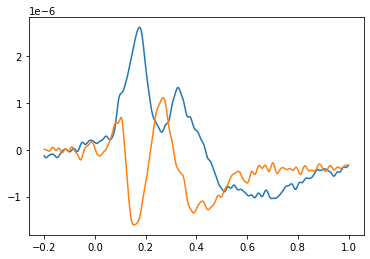

In [23]:
import matplotlib.pyplot as plt
plt.plot(revos_dict['Contra'][0].times, np.array([cueR_cda.mean(axis=(0,1)), 
                                                  cueL_cda.mean(axis=(0,1))]).T)

In [5]:

for k in revos_dict:
    for r,l in zip(revos_dict[k], levos_dict[k]):
        r.crop(-0.2,2.2)
        l.crop(-0.2,2.2)

fig, axs = plt.subplots(1,2)
mne.viz.plot_compare_evokeds(revos_dict,
                            combine='mean',
                            axes=axs[1],
                            title='Cue right',
                            legend=False,
                            show_sensors=True,
                            colors={k: config.colors[k] for k in ['Ipsi', 'Contra']},
                            ylim=dict(eeg=[-10, 5]),
                            show=False)
mne.viz.plot_compare_evokeds(levos_dict,
                            combine='mean',
                            axes=axs[0],title='Left sensors',
                            show_sensors=True,
                            legend=3,
                            colors={k: config.colors[k] for k in ['Ipsi', 'Contra']},
                            ylim=dict(eeg=[-10, 5]),
                            show=False)
plt.show()

dict_keys(['Ipsi', 'Contra'])

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


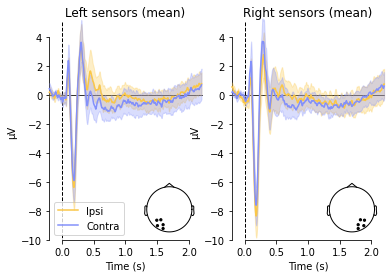

In [14]:
import matplotlib.pyplot as plt
for k in revos_dict:
    for r,l in zip(revos_dict[k], levos_dict[k]):
        r.crop(-0.2,2.2)
        l.crop(-0.2,2.2)

#plt.figure(2)
fig, axs = plt.subplots(1,2)
mne.viz.plot_compare_evokeds(revos_dict,
                            combine='mean',
                            axes=axs[1],
                            title='Right sensors',
                            legend=False,
                            show_sensors=True,
                            colors={k: config.colors[k] for k in ['Ipsi', 'Contra']},
                            ylim=dict(eeg=[-10, 5]),
                            show=False)
mne.viz.plot_compare_evokeds(levos_dict,
                            combine='mean',
                            axes=axs[0],title='Left sensors',
                            show_sensors=True,
                            legend=3,
                            colors={k: config.colors[k] for k in ['Ipsi', 'Contra']},
                            ylim=dict(eeg=[-10, 5]),
                            show=False)
plt.show()